#### Import Required Libraries

In [1]:
# Analysis
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
import joblib

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
data = pd.read_csv(r"C:\Users\Harrison\Downloads\sentiment_analysis_project\data\raw_data.csv")
                   
data.head()

,Reviewer,Country,StarRatings,Subject,Review,Date_posted
0,Mike Santarcangelo,US,3,"Amazon may be a fine company, but...","Amazon is easy to work with, but they fulfill ...","Tuesday, June 4, 2024"
1,Arthur Riding,GB,5,"Great range of products, generally superior qu...",I have been using AliExpress for well over a y...,"Tuesday, June 4, 2024"
2,UK shopper Val,GB,5,Good!,"A good, customer-centric marketplace. But neve...","Monday, June 3, 2024"
3,Jim Corkery,CA,1,I purchased an Android Tesla style…,I purchased an Android Tesla style radio.\nAft...,"Sunday, June 2, 2024"
4,chris bardin,IE,1,They are an absolute con job dont waste…,They are an absolute con job dont waste your m...,"Tuesday, June 4, 2024"


### Data Inspection and Cleaning

In [3]:
data.shape

(12000, 6)

The dataset contains 12,000 rows and 6 columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Reviewer     11997 non-null  object
 1   Country      11997 non-null  object
 2   StarRatings  12000 non-null  int64 
 3   Subject      12000 non-null  object
 4   Review       11161 non-null  object
 5   Date_posted  12000 non-null  object
dtypes: int64(1), object(5)
memory usage: 562.6+ KB


In [5]:
# Check the data type
data.dtypes

Reviewer       object
Country        object
StarRatings     int64
Subject        object
Review         object
Date_posted    object
dtype: object

In [6]:
# Check for duplicate
data.duplicated().sum()

0

The dataset has no duplicate

In [7]:
# Check the number unique values in each features
data.nunique()

Reviewer       11065
Country          147
StarRatings        5
Subject        11177
Review         11158
Date_posted     1372
dtype: int64

We can notice that there are 147 unique countries where the reviews came from

In [8]:
# Check for missing values
data.isnull().sum()

Reviewer         3
Country          3
StarRatings      0
Subject          0
Review         839
Date_posted      0
dtype: int64

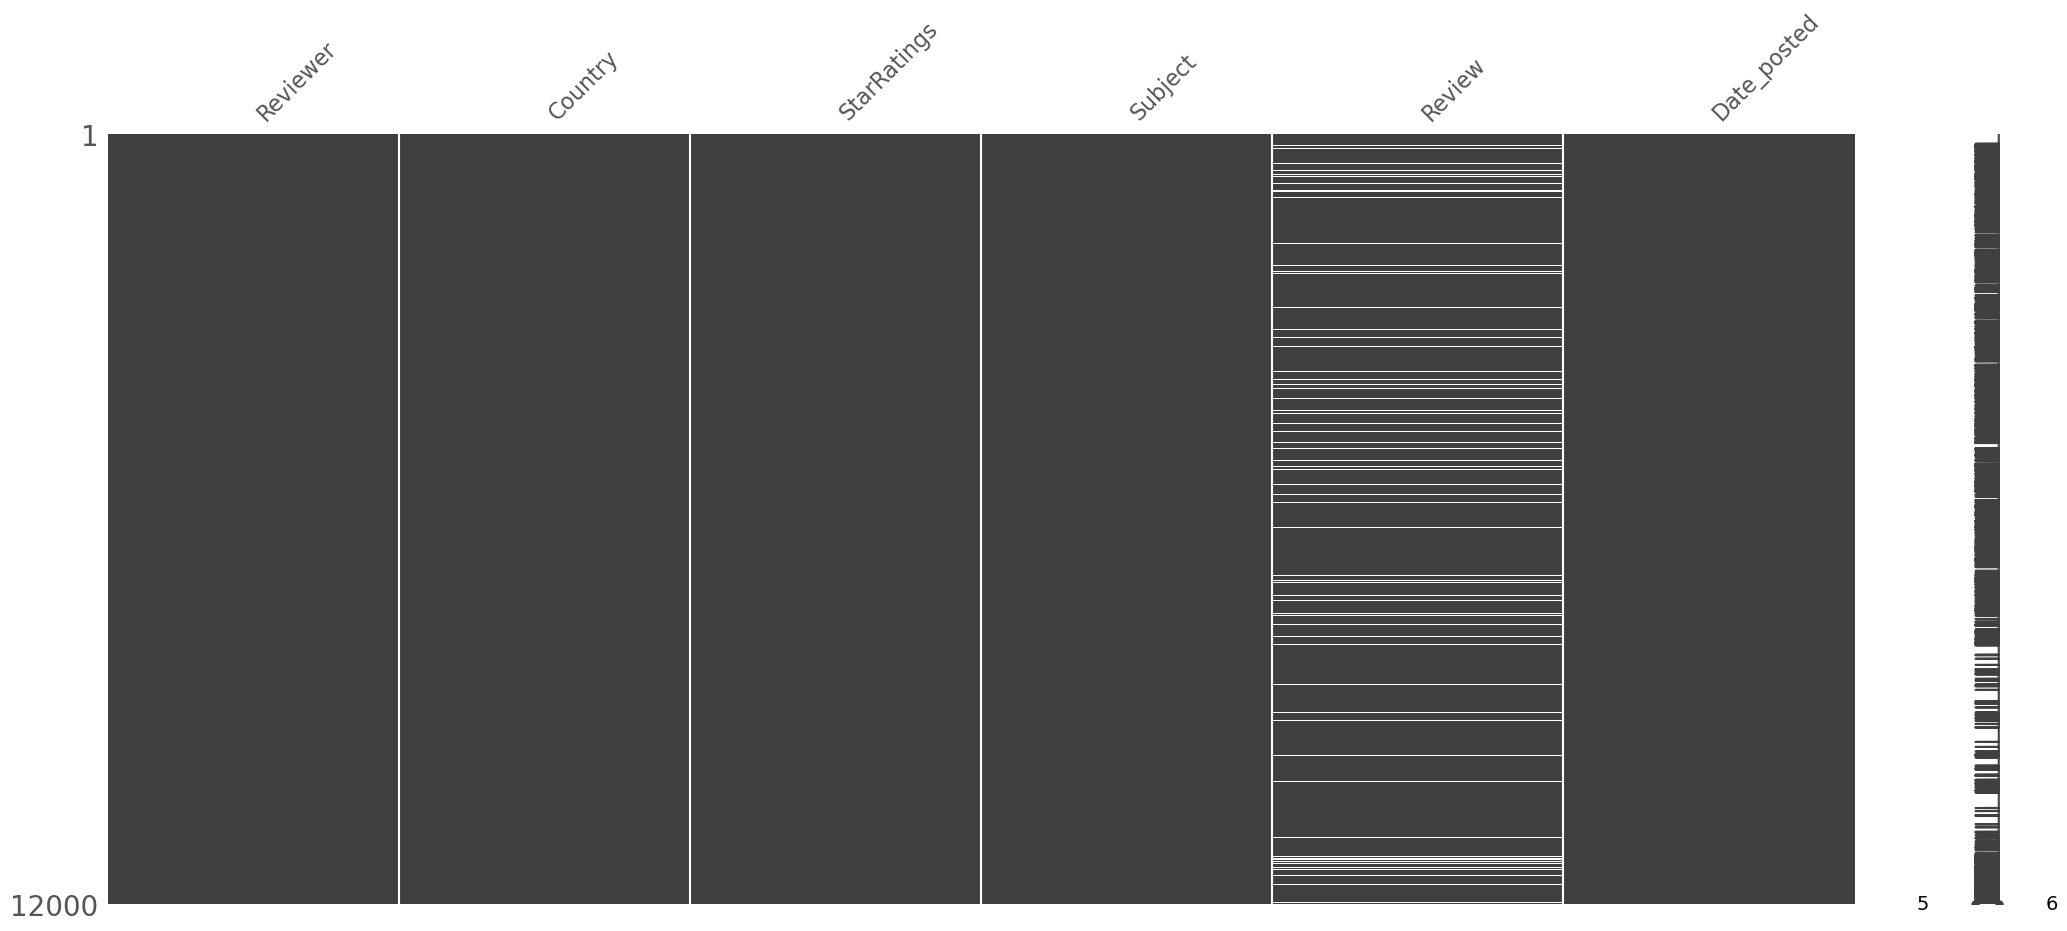

In [9]:
 # Visualizing the missing data
import missingno as msno

# Visualize nullity patterns
msno.matrix(data)

plt.show()

The dataset contains a small number of missing values in the 'Reviewer' and 'Country' columns and a substantial number in the 'Review' column. Despite this, we have decided to retain all data points, including those with missing information as potential insight could be derived from the columns

In [10]:
data.shape

(12000, 6)

In [14]:
# Save the cleaned data

data.to_csv('cleaned_data.csv', index=False)

The final dataset contains 12,000 rows and 6 columns

we will derive a sentiment from the StarRating. we will classify the StarRatings as either positive or negative.

Assumptions:
- if StarRatings is greater than or equal to 3, we will classify it as 'Positive'
- If StarRatings is less than 3, we will classify it as 'Negative'

In [11]:
# Creating a 'StarRatings_Sentiment' column to classify the sentiment of reviews based on the StarRatings

# Define the classification function
def classify_rating(StarRatings):
    if StarRatings >= 3:
        return 'Positive'
    else:
        return 'Negative'

# Apply the classification
data['StarRatings_Sentiment'] = data['StarRatings'].apply(classify_rating)

data.head()

,Reviewer,Country,StarRatings,Subject,Review,Date_posted,StarRatings_Sentiment
0,Mike Santarcangelo,US,3,"Amazon may be a fine company, but...","Amazon is easy to work with, but they fulfill ...","Tuesday, June 4, 2024",Positive
1,Arthur Riding,GB,5,"Great range of products, generally superior qu...",I have been using AliExpress for well over a y...,"Tuesday, June 4, 2024",Positive
2,UK shopper Val,GB,5,Good!,"A good, customer-centric marketplace. But neve...","Monday, June 3, 2024",Positive
3,Jim Corkery,CA,1,I purchased an Android Tesla style…,I purchased an Android Tesla style radio.\nAft...,"Sunday, June 2, 2024",Negative
4,chris bardin,IE,1,They are an absolute con job dont waste…,They are an absolute con job dont waste your m...,"Tuesday, June 4, 2024",Negative


In [12]:
# Sentiment distribution
sentiment_counts = data['StarRatings_Sentiment'].value_counts()
print(sentiment_counts)

StarRatings_Sentiment
Negative    6830
Positive    5170
Name: count, dtype: int64


In [21]:
# StarRating Sentiment = Negative
data[data['StarRatings_Sentiment'] == 'Negative']['StarRatings'].value_counts()

StarRatings
1    6418
2     412
Name: count, dtype: int64

Based on our StarRatings categorisation, 6,830 reviews are negative

In [22]:
# StarRatings Sentiment = Positive
data[data['StarRatings_Sentiment'] == 'Positive']['StarRatings'].value_counts()

StarRatings
5    4488
4     402
3     280
Name: count, dtype: int64

5,170 reviews are positive based on our categorization

## Data Preprocessing
- Text Cleaning: Remove noise, special characters, and irrelevant information.
- Tokenization: Split text into tokens.

In [13]:
data.sample(3)

,Reviewer,Country,StarRatings,Subject,Review,Date_posted,StarRatings_Sentiment
8819,Amalia,MX,2,"Avoid if possible, Usually sellers are scammers",While there are some good product deals and se...,"Thursday, December 2, 2021",Negative
4023,joy,CA,1,refund issues,If you ever wish to return something and they ...,"Tuesday, August 1, 2023",Negative
9977,Jean Walton Uptmor,US,1,HORRIBLE CUSTOMER SERVICE! NO RECOURSE UNTIL A...,I placed & paid for a small order on January 1...,"Monday, April 19, 2021",Negative


- Text cleaning and Tokenization

In [14]:
import re
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Text cleaning functions
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

def to_lowercase(text):
    return text.lower()

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_whitespace(text):
    return ' '.join(text.split())

# Tokenization function
def tokenize_text(text):
    return word_tokenize(text)

# Remove stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

# Lemmatization
def lemmatize_words(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]

# Comprehensive preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):
        return []
    text = remove_html_tags(text)
    text = to_lowercase(text)
    text = remove_special_characters(text)
    text = remove_numbers(text)
    text = remove_whitespace(text)
    tokens = tokenize_text(text)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize_words(tokens)
    return tokens

# Apply preprocessing to the 'Review' column
data['cleaned_review'] = data['Review'].apply(preprocess_text)

data.head(3)

,Reviewer,Country,StarRatings,Subject,Review,Date_posted,StarRatings_Sentiment,cleaned_review
0,Mike Santarcangelo,US,3,"Amazon may be a fine company, but...","Amazon is easy to work with, but they fulfill ...","Tuesday, June 4, 2024",Positive,"[amazon, easy, work, fulfill, order, via, rd, ..."
1,Arthur Riding,GB,5,"Great range of products, generally superior qu...",I have been using AliExpress for well over a y...,"Tuesday, June 4, 2024",Positive,"[using, aliexpress, well, year, consistently, ..."
2,UK shopper Val,GB,5,Good!,"A good, customer-centric marketplace. But neve...","Monday, June 3, 2024",Positive,"[good, customercentric, marketplace, neverthel..."


- Removing Noise

Rarely used words, often referred to as low-frequency words, can sometimes be noise in the data and may not contribute significantly to the sentiment analysis. Removing these words can help simplify the model and potentially improve its performance.

In [16]:
# Combine tokens back into strings for each review
data['cleaned_review'] = data['cleaned_review'].apply(lambda tokens: ' '.join(tokens))

In [17]:
# Eliminating rarely used words, often referred to as low-frequency words
freq_words = pd.Series(" ".join(data['cleaned_review']).split()).value_counts()

freq_words

aliexpress      8406
item            6535
seller          6413
refund          4935
order           4615
                ... 
alijoke            1
fraudstersmy       1
arrivedalis        1
exemplory          1
favoring           1
Name: count, Length: 19855, dtype: int64

In [18]:
# Dropping words that appear once in the review
drops = freq_words[freq_words <= 1]
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

In [19]:
freq_words_1 = pd.Series(' '.join(data['cleaned_review']).split()).value_counts()

freq_words_1

aliexpress     8406
item           6535
seller         6413
refund         4935
order          4615
               ... 
insensitive       2
accessed          2
upped             2
naira             2
exsg              2
Name: count, Length: 8829, dtype: int64

In [20]:
# Viewing the reviews
data['cleaned_review'].tail(1000)

11000    ive purchased lot company use reasonable thing...
11001    good place buy stuff far quite reliable really...
11002                    best shop world buy need recomend
11003    help product work tried contact seller help tr...
11004    year worst used kind good refunded money got d...
                               ...                        
11995                                  im happy come thank
11996                                    excellent quality
11997    ordered item aliexpress two seller cancelled s...
11998    great platform business vendor would never abl...
11999    satisfied aliexpress recently however changed ...
Name: cleaned_review, Length: 1000, dtype: object

### Feature Engineering:
- TF-IDF: Transform text data into TF-IDF matrices.

In [32]:
data.head(2)

,Reviewer,Country,StarRatings,Subject,Review,Date_posted,StarRatings_Sentiment,cleaned_review
0,Mike Santarcangelo,US,3,"Amazon may be a fine company, but...","Amazon is easy to work with, but they fulfill ...","Tuesday, June 4, 2024",Positive,amazon easy work fulfill order via rd party co...
1,Arthur Riding,GB,5,"Great range of products, generally superior qu...",I have been using AliExpress for well over a y...,"Tuesday, June 4, 2024",Positive,using aliexpress well year consistently impres...


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
# #Instantiate TF-IDF
tfidf_vectorizer = TfidfVectorizer()
x_tfidf = tfidf_vectorizer.fit_transform(data['cleaned_review'])

x_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
# Save the fitted vectorizer using joblib
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

print("TF-IDF Vectorizer saved successfully!")

TF-IDF Vectorizer saved successfully!


In [23]:
# Save the fitted vectorizer using joblib
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

print("TF-IDF Vectorizer saved successfully!")

TF-IDF Vectorizer saved successfully!


- Define the Text Preprocessing Functions and Class

In [24]:

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# Define text preprocessing functions
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

def to_lowercase(text):
    return text.lower()

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_whitespace(text):
    return ' '.join(text.split())

def tokenize_text(text):
    return word_tokenize(text)

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

def lemmatize_words(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = remove_html_tags(text)
    text = to_lowercase(text)
    text = remove_special_characters(text)
    text = remove_numbers(text)
    text = remove_whitespace(text)
    tokens = tokenize_text(text)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize_words(tokens)
    return ' '.join(tokens)

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return [preprocess_text(text) for text in X]
        

In [25]:
# Initialize the TextPreprocessor
text_preprocessor = TextPreprocessor()

# Save the TextPreprocessor
joblib_file = "text_preprocessor.joblib"
joblib.dump(text_preprocessor, joblib_file)

['text_preprocessor.joblib']